In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import math

In [37]:
def distance(p1, p2):
    dx = abs(p2['pos'][0] - p1['pos'][0])
    dy = abs(p2['pos'][1] - p1['pos'][1])
    return round(100 * math.sqrt(dx * dx + dy * dy)) / 100

In [24]:
df = pd.read_csv('data/demo-4.csv')

In [25]:
print(df.head())

  road       id  model_type condition   name  lat  lon  length
0   N1  1000000  sourcesink       NaN  SoSi1    0    0       4
1   N1  1000001       link        NaN    NaN    1    1    1800
2   N1  1000002     bridge          A    NaN    2    2     200
3   N1  1000003        link       NaN    NaN    3    3    1500
4   N1  1000004      bridge         A    NaN    4    4       8


# Create a graph with nodes as bridges or sourcesinks

First, I try to add them with the position manually

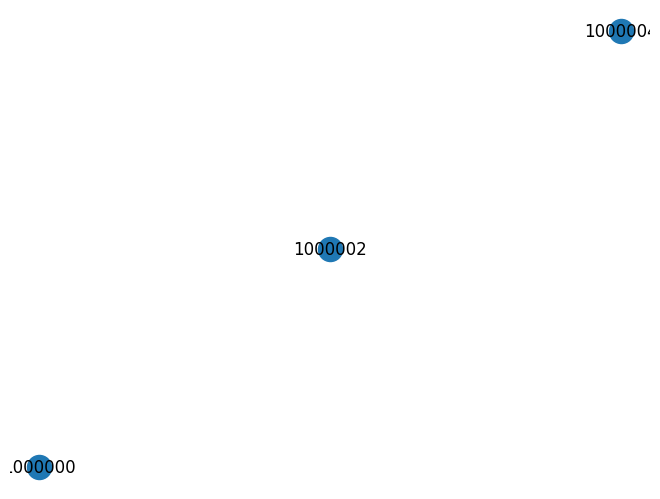

In [26]:
if __name__ == '__main__':
    G = nx.Graph()
    G.add_node(1000000, pos=(df['lat'][0], df['lon'][0]))
    G.add_node(1000002, pos=(df['lat'][2], df['lon'][2]))
    G.add_node(1000004, pos=(df['lat'][4], df['lon'][4]))

    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, with_labels=True)
    plt.show()

Now, I add the nodes (sourcesinks and bridges) with a loop

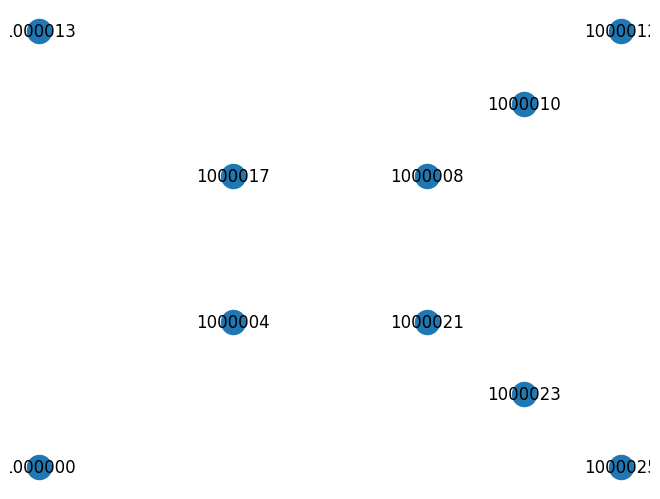

In [27]:
if __name__ == '__main__':
    G = nx.Graph()

    #create the nodes; bridge=node, sourcesink=node
    for i in range(len(df)):
        if df['model_type'][i]=='bridge':
            G.add_node(df['id'][i], pos=(df['lat'][i], df['lon'][i]))

        if df['model_type'][i]=='sourcesink':
            G.add_node(df['id'][i], pos=(df['lat'][i], df['lon'][i]))

    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, with_labels=True)
    plt.show()


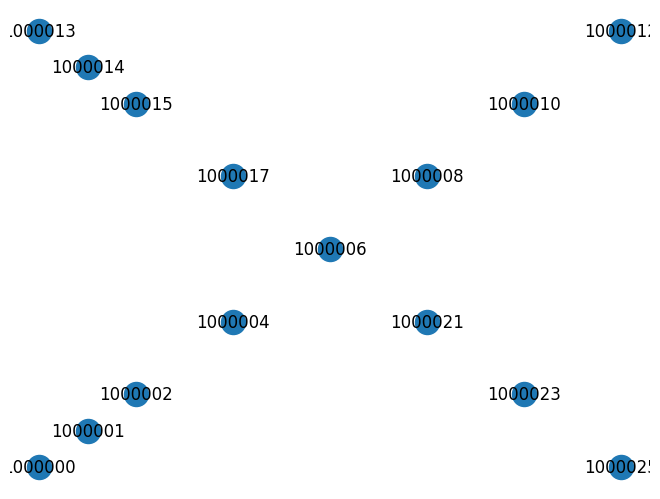

In [28]:
if __name__ == '__main__':
    G = nx.Graph()
    #G.add_node(1)

    #create the nodes; bridge=node, sourcesink=node
    for i in range(len(df)):
        if df['model_type'][i]!='link':
            G.add_node(df['id'][i],pos=(df['lat'][i], df['lon'][i]))
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, with_labels=True)


    plt.show()

# Add edges- the links- to the graph

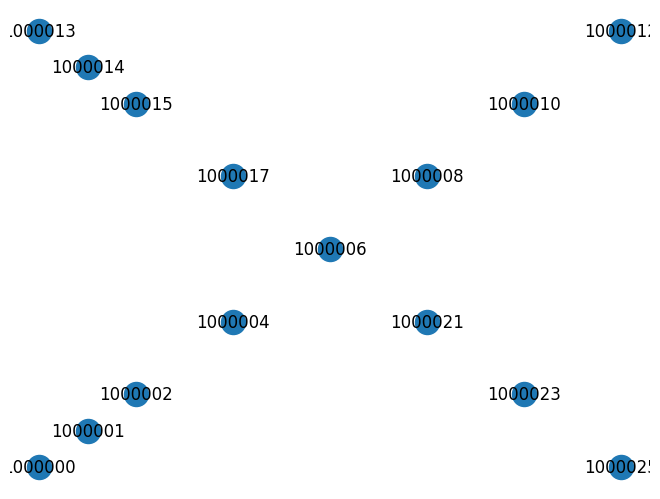

In [29]:
if __name__ == '__main__':
    G = nx.Graph()
    #G.add_node(1)

    #create the nodes; bridge=node, sourcesink=node
    for i in range(len(df)):
        if df['model_type'][i] != 'link':
            G.add_node(df['id'][i],pos=(df['lat'][i], df['lon'][i]))
    #G.add_weighted_edges_from([(1000000, 1000002, 1500)], weight='length')

    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, with_labels=True)
    #labels = nx.get_edge_attributes(G, 'weight')
    #nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)



    plt.show()


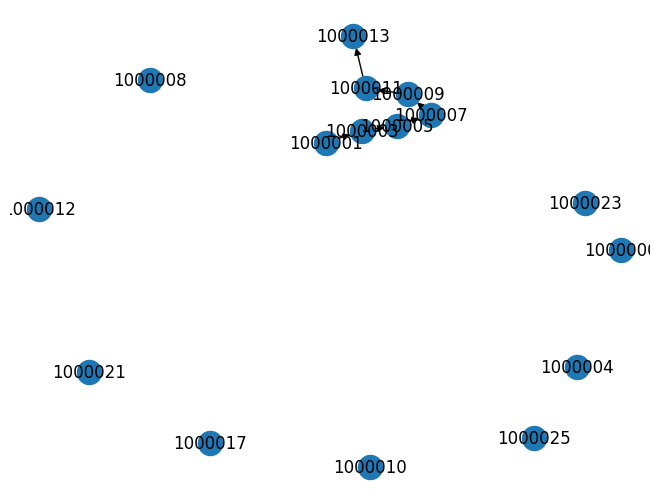

In [30]:
if __name__ == '__main__':
    G = nx.DiGraph()
    #G.add_node(1)

    #create the nodes; bridge=node, sourcesink=node
    for i in range(len(df)):
        if df['model_type'][i]=='bridge':
            G.add_node(df['id'][i])

        if df['model_type'][i]=='sourcesink':
            G.add_node(df['id'][i])

    #create the edges
    for i in range(2,14,2):
            G.add_edge(df['id'][i-1], df['id'][i+1])

    nx.draw(G, with_labels=True)
    plt.show()

START HEREEEEEEE

In [31]:
# Standardize column names and remove extra spaces
df["model_type"] = df["model_type"].str.strip().str.lower()

# Create an undirected graph
G = nx.Graph()

# Add nodes (sourcesinks, bridges, intersections, and links)
for _, row in df.iterrows():
    G.add_node(row["id"], model_type=row["model_type"], name=row["name"], lat=row["lat"], lon=row["lon"])

# Add edges ensuring correct connection rules
for i in range(len(df) - 1):
    node1 = df.iloc[i]["id"]
    node2 = df.iloc[i + 1]["id"]
    length = df.iloc[i]["length"]
    type1 = df.iloc[i]["model_type"]
    type2 = df.iloc[i + 1]["model_type"]

    # Ensure connections follow logical rules:
    # - Do NOT connect two sourcesinks
    # - Links connect elements properly
    if not (type1 == "sourcesink" and type2 == "sourcesink"):
        if node1 in G.nodes and node2 in G.nodes:
            G.add_edge(node1, node2, weight=length)

In [48]:
 #create a dictionary (pos) that maps each node to its (longitude, latitude) , but only if both coordinates are not NaN!!
pos = {}
for node in G.nodes:
    lat = G.nodes[node]["lat"]
    lon = G.nodes[node]["lon"]
    if not pd.isna(lat) and not pd.isna(lon):  # Only add valid coordinates
        pos[node] = (lon, lat)  # Store coordinates as (x, y) = (longitude, latitude)

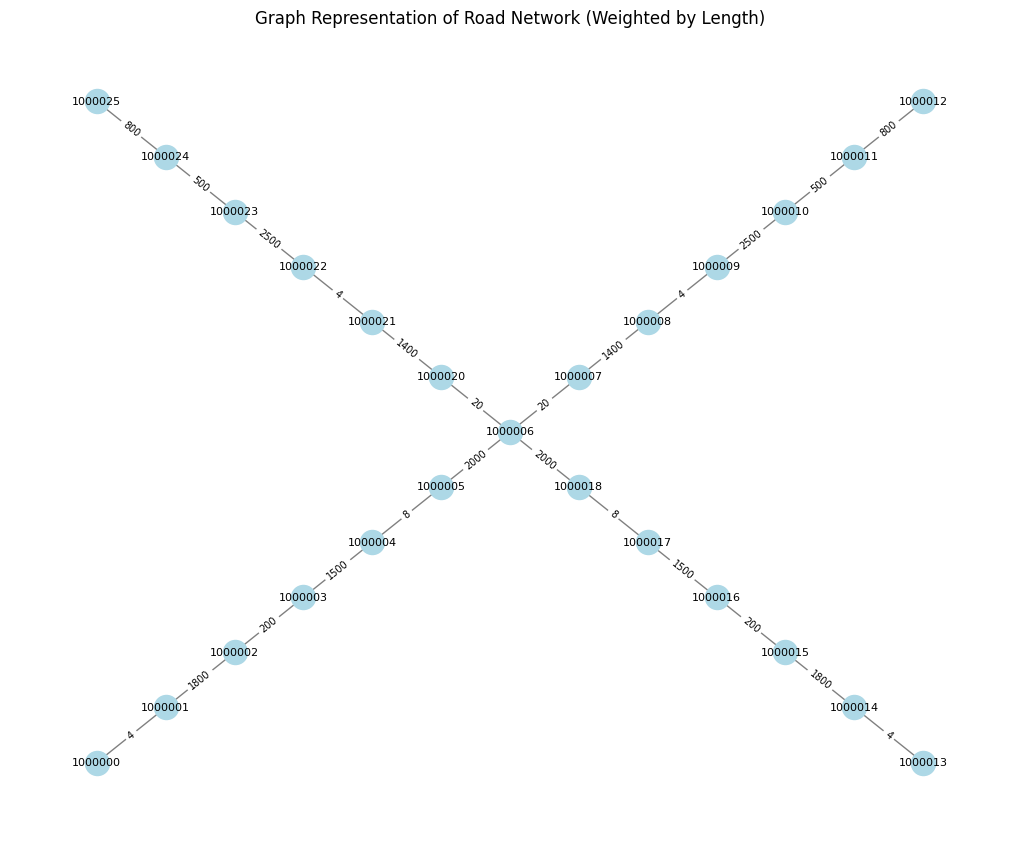

In [49]:
# Draw the graph
plt.figure(figsize=(10, 8))
edges = G.edges(data=True)

# Draw edges with weights
nx.draw(G, pos, with_labels=True, node_size=300, node_color="lightblue", edge_color="gray", font_size=8)

nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']}" for u, v, d in edges}, font_size=7)

# Show the graph
plt.title("Graph Representation of Road Network (Weighted by Length)")
plt.show()



In [34]:
G.edges

EdgeView([(1000000, 1000001), (1000001, 1000002), (1000002, 1000003), (1000003, 1000004), (1000004, 1000005), (1000005, 1000006), (1000006, 1000007), (1000006, 1000018), (1000006, 1000020), (1000007, 1000008), (1000008, 1000009), (1000009, 1000010), (1000010, 1000011), (1000011, 1000012), (1000013, 1000014), (1000014, 1000015), (1000015, 1000016), (1000016, 1000017), (1000017, 1000018), (1000020, 1000021), (1000021, 1000022), (1000022, 1000023), (1000023, 1000024), (1000024, 1000025)])

In [42]:
# Define source and target nodes
source_node = 1000000  # Replace with an actual sourcesink ID
target_node = 1000013  # Replace with the target node ID

try:
    # Compute shortest path and its length
    shortest_path = nx.shortest_path(G, source=source_node, target=target_node, weight="weight")
    total_distance = nx.shortest_path_length(G, source=source_node, target=target_node, weight="weight")

    # Print the results
    print(f"Shortest path from {source_node} to {target_node}: {shortest_path}")
    print(f"Total distance: {total_distance} meters")
except nx.NetworkXNoPath:
    print(f"No path found between {source_node} and {target_node}.")
except nx.NodeNotFound as e:
    print(f"Error: {e}")

Shortest path from 1000000 to 1000013: [1000000, 1000001, 1000002, 1000003, 1000004, 1000005, 1000006, 1000018, 1000017, 1000016, 1000015, 1000014, 1000013]
Total distance: 11024 meters


FileNotFoundError: [Errno 2] No such file or directory: '../data/demo-4.csv'

In [5]:
from collections import defaultdict
import pandas as pd
path_ids_dict = defaultdict(lambda: pd.Series())
print(path_ids_dict)

defaultdict(<function <lambda> at 0x000002A549183060>, {})


In [6]:
path_ids_dict[100000,1000013]=[100000,1000001,1000002,1000003,1000004,1000005,1000006,1000007,1000008,1000009,1000010,1000011,1000012,1000013]
print(path_ids_dict)



defaultdict(<function <lambda> at 0x000002A549183060>, {(100000, 1000013): [100000, 1000001, 1000002, 1000003, 1000004, 1000005, 1000006, 1000007, 1000008, 1000009, 1000010, 1000011, 1000012, 1000013]})


In [7]:
path_ids_dict[100002,1000013]

Series([], dtype: object)

In [12]:
if path_ids_dict[100002,1000013].empty:
    print('indeed')

indeed


In [ ]:
if not self.path_ids_dict(source,sink): # if this is this (100000:1000025)=[]
    self.path_ids_dict=self.get_shortest_path(source, sink) #(100000:1000025)=[a route]

In [8]:
path_ids_dict2={}
path_ids_dict2[100000,1000013]=[100000,1000001,1000002,1000003,1000004,1000005,1000006,1000007,1000008,1000009,1000010,1000011,1000012,1000013]
print(path_ids_dict2)

{(100000, 1000013): [100000, 1000001, 1000002, 1000003, 1000004, 1000005, 1000006, 1000007, 1000008, 1000009, 1000010, 1000011, 1000012, 1000013]}


In [9]:
path_ids_dict2[100002,1000013]

KeyError: (100002, 1000013)